
# Project 1: Digit Classification with KNN


# Intro
---
In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. 
As always, you're welcome to work on the project in groups and discuss ideas over Slack, but <b> please prepare your own write-up (with your own code). </b> To be safe, please credit any sources used.


## Grading
---
 - Make sure to answer every part in every question.
 - There are 5 questions, each worth an equal number of points.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean or is not well commented
   - the functions or answers are excessively long

## Requirements:
---
1. Comment your code.
1. Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning, keep things inside functions).

## Additional reading and notes
---

If you are looking to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

Additionally, if you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'1.0.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [15]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', as_frame=False, return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Question 1: Visualize a select sample of images
---
Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* Make the digits nice and big.
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

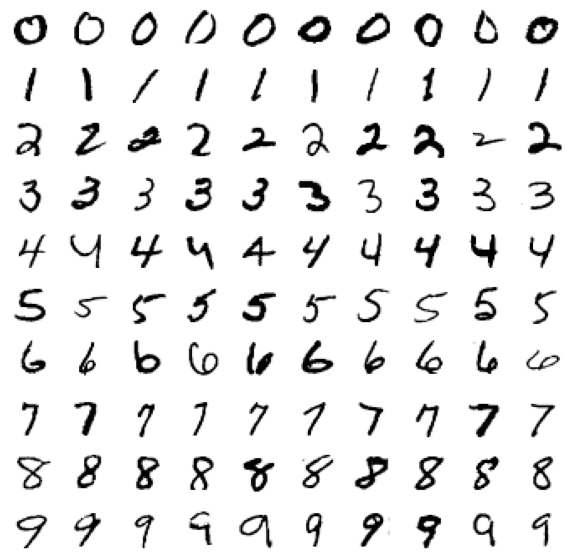

In [23]:
def Q1(num_examples=10):
  ### STUDENT START ###
  plt.rc("image",cmap="Greys")
  fig, axes = plt.subplots(num_examples, num_examples, figsize = (10,10))
  for i, digit in enumerate(digits):
      for j in range(10):
          sample = mini_train_data[mini_train_labels == digit][j].reshape((28,28))
          axes[i,j].imshow(sample)
          axes[i,j].axis("off")
  plt.show()
  ### STUDENT END ###
Q1(10)

### Question 2: Evaluating different choices of k
---

1. Produce k-Nearest Neighbors models with k = 1, 3, 5, 7, and 9.  
1. Print the accuracy of each model. 
1. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label. 
1. Which digit is the most *difficult* for the 1-Nearest Neighbor model to classify correctly? How did you choose and why?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Print only the information asked so it is easy to read and compare.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.
* Check out what the function "score" does.

In [38]:
def Q2(k_values):

### STUDENT START ###
  for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(mini_train_data, mini_train_labels)
    dev_predict = knn.predict(dev_data)
    print("k =" + str(i) + ": Accuracy = "+ str(knn.score(dev_data,dev_labels)) + "\n")
    if i == 1:
      print(classification_report(dev_labels,dev_predict))
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
Q2(k_values)

k =1: Accuracy = 0.89

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       101
           1       0.90      0.98      0.94       115
           2       0.94      0.84      0.89        99
           3       0.85      0.87      0.86       101
           4       0.96      0.77      0.86       106
           5       0.88      0.85      0.86        85
           6       0.93      0.95      0.94       103
           7       0.82      0.97      0.89       103
           8       0.95      0.88      0.91        80
           9       0.77      0.80      0.79       107

    accuracy                           0.89      1000
   macro avg       0.90      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

k =3: Accuracy = 0.889

k =5: Accuracy = 0.885

k =7: Accuracy = 0.874

k =9: Accuracy = 0.863



Answer to part 4: It depends, if youre only looking at most misclassification than 9 would be it because it reflects most true positives. However, if you're looking at most false negatives than 9 would be it because its recall is lowest.

### Question 3: Examining the importance of training size
---
1. Produce 1-Nearest Neighbor models using training data of various sizes. For example, ```train_data[:train_size]```.
1. Evaluate and show the accuracy achieved by each model.  
1. Show the time needed to: 
  1. Train each model.
  1. Measure the accuracy of each model.
1. What do you see? Is this what you expected to see and why?
1. Plot on the same graph (as a function of training size):
  1. the time needed for training
  1. the time needed for calculating accuracy

Notes:
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

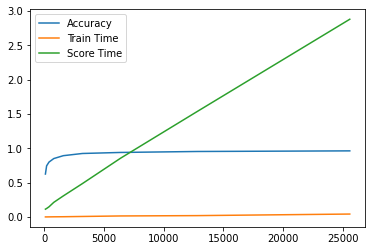

Train Size =100
 Accuracy = 0.747
 Train Time = 0.001373291015625
  Score Time = 0.11742234230041504
Train Size =200
 Accuracy = 0.805
 Train Time = 0.002342700958251953
  Score Time = 0.12544941902160645
Train Size =400
 Accuracy = 0.851
 Train Time = 0.0015385150909423828
  Score Time = 0.14748859405517578
Train Size =800
 Accuracy = 0.874
 Train Time = 0.0029838085174560547
  Score Time = 0.18958330154418945
Train Size =1600
 Accuracy = 0.9
 Train Time = 0.0038406848907470703
  Score Time = 0.2768104076385498
Train Size =3200
 Accuracy = 0.94
 Train Time = 0.012150764465332031
  Score Time = 0.4747433662414551
Train Size =6400
 Accuracy = 0.951
 Train Time = 0.01526951789855957
  Score Time = 0.8386220932006836
Train Size =12800
 Accuracy = 0.963
 Train Time = 0.02067708969116211
  Score Time = 1.4608421325683594
Train Size =25600
 Accuracy = 0.967
 Train Time = 0.04211902618408203
  Score Time = 2.7613937854766846


In [49]:
def Q3(train_sizes, accuracies, train_times, eval_timess):

### STUDENT START ###
  for i in train_sizes:
    knn = KNeighborsClassifier(n_neighbors=1)
    train_start_time = time.time()
    knn.fit(train_data[0:i], train_labels[0:i])
    train_end_time = time.time()
    train_measure_time = train_end_time - train_start_time
    score_start_time = time.time()   
    dev_predict = knn.predict(dev_data)
    accuracy = knn.score(dev_data,dev_labels)
    score_end_time = time.time()
    score_measure_time = score_end_time - score_start_time
    print("Train Size =" + str(i) + "\n"+ " Accuracy = "+ str(accuracy) + "\n" + 
          " Train Time = "+ str(train_measure_time) + "\n" + "  Score Time = "+ 
          str(score_measure_time))
    accuracies.append(accuracy)
    train_times.append(train_measure_time)
    eval_times.append(score_measure_time)

# plot lines
plt.plot( train_sizes,accuracies, label = "Accuracy")
plt.plot( train_sizes,train_times, label = "Train Time")
plt.plot( train_sizes,eval_times, label = "Score Time")
plt.legend()
plt.show()
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
train_times = []
eval_times = []
Q3(train_sizes, accuracies, train_times, eval_times)

RESULTS: What we see is expected because knn computational complexity is almost entirely in the scoring section. The training phase doesnt technically exist (it still takes time to model the points) since all the computations are done in the scoring section. The socring portion has a linear growth which makes sese because KNN time complexity is based on the fact that for each predictor it measures its distance to all points and determines for k what points are closest and predicts off of that. O(k*n*d) (d is dimensionality of data) Since all of the points were kept constant except n, and all are just multipliers, it makes sense it grows in a linear fashion. Lastly accuracy makes sense that it is logorithmic in nature as knn will gain lots of accuracy as other points that are similar to it are added which means the nearest points will be the correct ones but once you reach a certain level where the nearest neighbor is either one or the other then accuracy wont increase for example lots of times people write 0 and 6 similarly because they overdid the curve on the 0 or underdid it on the 6. More data will result in little accuracy gained since the knn is overlapped of 6's and 0's.

### Question 4: Evaluating if we should obtain additional data
---

In this question we wish to predict what accuracy we would get if we had additional training data.

Our input, our features and labels, are the output from the previous question. Based on the training size and accuracy we got in the previous question, we wish to predict the accuracy we would get if we had larger training sizes.

1. Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. 
1. Print $R^2$ of the linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot on a lineplot graph:
  1. the actual accuracies we obtained in the previous question 
  1. and the accuracies our model predicted we would have gotten.
  1. The X axis is the training set size. 
  1. You can limit the range of X and Y to the range where you have data for both plots. Meaning, in the this question, we want to visualize how good the prediction is.
1. What are two things that are wrong with our model?
1. Apply a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues. 
1. Show $R^2$ of the improved linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot a lineplot graph of both again as before.
  1. Be sure to plot this where the Y axis is accuracy and X axis is training set size, **not the transformed space**!
  1. Choose the range of X and Y to visualize effectively.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hints:
  1. You have two problems here, how well your model fits and predicting *illogical* values of accuracy.
  1. You can look at:
    1. [logit](https://en.wikipedia.org/wiki/Logit): $\frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$ which takes numbers in $\[\infty,-\infty\]$ and outputs numbers in $(0, 1)$.
    1. [logistic](https://en.wikipedia.org/wiki/Logistic_function): $log(\frac{p}{1 - p})$ which takes numbers between $(0, 1)$ and outputs numbers between $\[\infty,-\infty\]$.
    1. It also happens that $x = logistic(p)$ is the same thing as $logit(x)=p$.

No Transformation Accuracies = [[1.2125878437031226], [1.5703653761221987], [6.8177691849353135]]
𝑅2 = 0.44143618558624353

Transform Predictor and Outcome Accuracies = [0.9690362534525304, 0.9720276066370492, 0.978408272048489]
𝑅2 = 0.9310160417889334



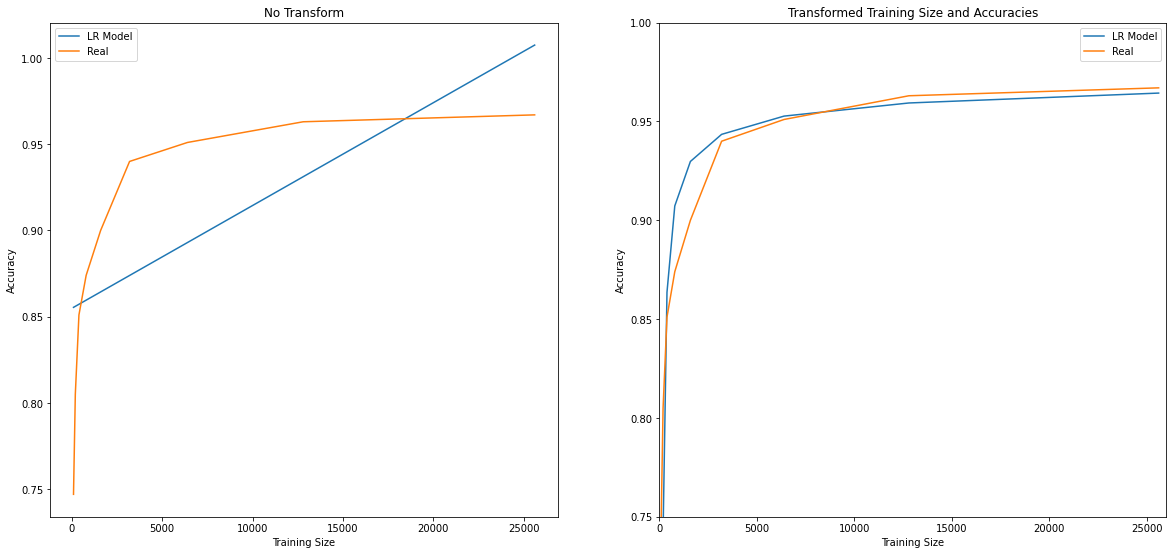

In [101]:
def Q4():

### STUDENT START ###
  #No Transformation
  train_quant = np.array([60000,120000,1000000]).reshape(-1,1)
  accuracies_x = np.array(accuracies).reshape(-1,1)
  trained_sizes= np.array(train_sizes).reshape(-1,1)
  lm= LinearRegression(fit_intercept = True)
  lm.fit(trained_sizes, accuracies_x)
  lm_pred = lm.predict(trained_sizes)
  fig = plt.figure(figsize=(20, 20))
  no_t = fig.add_subplot(2,2,1)
  no_t.plot(trained_sizes, lm_pred, label="LR Model")
  plt.plot(trained_sizes,accuracies_x,label="Real")
  no_t.legend()
  no_t.set_title('No Transform')
  no_t.set_xlabel('Training Size')
  no_t.set_ylabel('Accuracy')
  no_t_accuracies = lm.predict(train_quant).tolist()
  print("No Transformation Accuracies = " + str(no_t_accuracies) + "\n"
  + "𝑅2 = " + str(lm.score(trained_sizes,accuracies_x)) + "\n")

  #Transformation
  tranf_accuracies = np.array(list(map(lambda x: x/(1.0 - x), accuracies)))
  log_quant = np.log(train_quant)
  log_sizes = np.log(trained_sizes)
  lm2 = LinearRegression(fit_intercept = True)
  lm2.fit(log_sizes, tranf_accuracies)
  lm2_pred = lm2.predict(log_sizes) 
  lm2_prob = list(map(lambda x:x/(1.0+x),lm2_pred))
  tplt = fig.add_subplot(2,2,2)
  tplt.plot(trained_sizes,lm2_prob, label="LR Model")
  tplt.plot(trained_sizes,accuracies_x, label="Real")
  tplt.set_title('Transformed Training Size and Accuracies')
  tplt.set_xlabel('Training Size')
  tplt.set_ylabel('Accuracy')
  tplt.legend()
  tplt.set_xlim([0,26000])
  tplt.set_ylim([.75,1.00])
  two_trans = lm2.predict(log_quant) 
  probability_both = list(map(lambda x:x/(1.0+x),two_trans)) 
  print("Transform Predictor and Outcome Accuracies = " + str(probability_both) +"\n"+ 
        "𝑅2 = " + str(lm2.score(log_sizes,tranf_accuracies)) + "\n")
### STUDENT END ###

Q4()

Answer to part 5:  The two things wrong with our model our firstly probability goes past 1. This is impossible and should be noted. The second issue is that it is increasing at a linear rate which is not the case. The accuracy growth is going to be logarithmic for the reasons specified in problem 4.

### Question 5: Getting to know the confusion matrix.
---

1. Produce a 1-Nearest Neighbor model.
1. Show the confusion matrix. 
1. Which digit does the model most often confuse with which digit? (*for example, the model most often mistakes the digit $1$ as the digit $7$*).
1. Show examples of the misclassified digit.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.
- No need to calculate the "most confused digits" programmatically.

In [104]:
def Q5():

### STUDENT START ###
  knn = KNeighborsClassifier(n_neighbors=1)
  knn.fit(mini_train_data, mini_train_labels)
  dev_predict = knn.predict(dev_data)
  accuracy = knn.score(dev_data,dev_labels)
  conf_matrix = confusion_matrix(dev_labels,dev_predict)
  print(conf_matrix)



### STUDENT END ###

Q5()


[[ 98   0   1   0   0   0   2   0   0   0]
 [  0 113   0   0   0   0   0   1   1   0]
 [  0   6  83   4   0   2   0   3   1   0]
 [  1   0   1  88   0   4   1   1   1   4]
 [  0   6   0   0  82   1   0   2   0  15]
 [  1   0   0   8   0  72   2   0   1   1]
 [  2   1   0   0   0   1  98   0   0   1]
 [  0   0   0   0   0   0   0 100   0   3]
 [  0   0   2   2   0   1   2   1  70   2]
 [  1   0   1   1   3   1   0  14   0  86]]


Answer to part 3: 
The most confused digit is 9 when it misclassified for a 4. It is misclassified as such 15 times, close to 8's being confused for 9's.

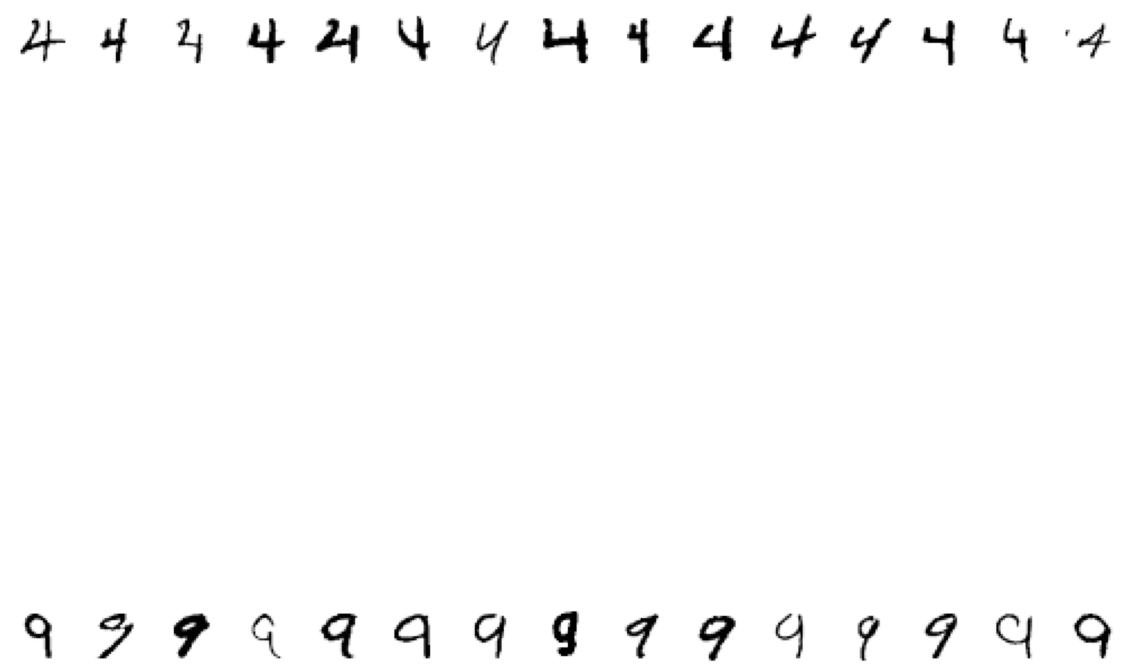

In [111]:
    fig, axes = plt.subplots(2,15, figsize = (20,20))
    for i, number in enumerate(np.array(['4','9'])):
        for j in range(15):
            image = dev_data[dev_labels == number][j].reshape((28,28))
            axes[i,j].imshow(image)
            axes[i,j].axis("off")
    plt.show()